In [69]:
#Paquetes:

import os
import numpy as np
from PIL import Image #Se importa con pip install pillow, sirve para manejar imágenes
import matplotlib.pyplot as plt
import cv2 #una mehor libreŕia para manejar imágenes llamada "opencv"
from scipy.signal import convolve2d #para la convolusión

In [2]:
def create_sine_pattern(size=480, cycles=10):
    # size: dimensión (cuadrada)
    # cycles: número de ciclos de seno a lo largo de la imagen
    x = np.linspace(0, 2*np.pi * cycles, size) #es decir el periodo es cycles
    y = np.linspace(0, 2*np.pi * cycles, size)
    X, Y = np.meshgrid(x, y) 
    # patrón senoidal en una dirección
    pattern = (np.sin(X) + 1) / 2  # valores entre 0 y 1
    img_arr = (pattern * 255).astype(np.uint8) #al multiplicar por 255 lo llevamos a [0, 255]
    return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES

# Ejemplo:
# Desempaquetar
arr, img = create_sine_pattern(size=480, cycles=10)

# Ahora sí:
print(arr.shape)   # array NumPy para FFT -> (480,480)
img.show()         # objeto PIL.Image -> lo abre en visor

#img.save("sine_pattern_480.png")  De esa forma se guarda la imágen

(480, 480)


/tmp/ipykernel_42715/282621275.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES


# FFT

NumPy en Python es el que implementa la transformada discreta de Fourier (DFT) y por supuesto la transformada rápida (FFT). Trabajamos entonces con señales finitas y además la máquina asume periodicidad. Toda la documentación de su implementación se encuentra consignada en: https://numpy.org/doc/stable/reference/routines.fft.html 

## Implementación 

Como brochazo de la documentación es bueno recordar la definición de DFT tal como el profe la dio:

$$
X[k] = \sum_{n=0}^{N-1} x[n]  e^{-j \tfrac{2\pi}{N}kn}, 
\quad k = 0,1,2,\dots,N-1
$$

Es claro entonces que k denota dominio frecuencial y n dominio espacial/temporal. Acá es importante notar de la documentación como llamar la inversa: 

- `np.fft.fft(x)` - esta es la manera de hacer una transformada de Fourier **OJO** en 1D
- `np.fft.ifft(x)` - eso hace la inversa en 1D

Para 2 dimensiones se implementa con la notación:

- `np.fft.fft2(x)`

Y como nos imaginamos para n-dimensiones de la siguiente manera: 

- `np.fft.fftn()`

Cabe aclarar que existe también la implementación para cuando nuestro input es real, simplemente se hace:

- `np.fft.rfft(x)`

Entonces, centrémonos en qué recibe la función `numpy.fft.fft(a, n=None, axis=-1, norm=None)`


## Parámetros de la función FFT

### `a` (array_like)
**Entrada** que quieres transformar (vector 1D, o si es un array multidimensional, aplica la FFT a lo largo del eje que indiques).  
Puede ser **real** o **complejo**.

### `n` (opcional, int)
Número de puntos de la FFT.  
- Si `n` es **mayor** que la longitud de `a` → rellena con **ceros al final**  
- Si `n` es **menor** → **trunca** `a`  
- Si no lo especificas → usa la longitud de `a` en el eje especificado

### `axis` (opcional, int, por defecto = -1)
El eje del array sobre el que se calcula la FFT.  
- **-1** significa "último eje" (ejemplo típico: en un array 2D calcula la FFT de cada fila)

### `norm` (opcional, {None, "ortho"})
Normalización.  

| Valor | Descripción |
|-------|-------------|
| **None** (por defecto) | La directa no lleva factor $1/N$. La inversa (`ifft`) sí lleva $1/N$ |
| **"ortho"** | Hace la FFT y la IFFT simétricamente normalizadas, con factor $1/\sqrt{N}$ |







In [8]:

# Señal de ejemplo (1D)
x = np.array([1, 2, 3, 4], dtype=float)
print("Señal original x:", x)

# ===== Caso 1: básico =====
X1 = np.fft.fft(x)
print("\nCaso 1: fft(x) -> (n=None, axis=-1, norm=None)")
print(X1)

# ===== Caso 2: con n mayor (zero-padding) =====
X2 = np.fft.fft(x, n=8)  # rellena con 4 ceros
print("\nCaso 2: fft(x, n=8) -> zero padding hasta longitud 8")
print(X2)

# ===== Caso 3: con n menor (truncado) =====
X3 = np.fft.fft(x, n=2)  # se queda solo con los dos primeros valores
print("\nCaso 3: fft(x, n=2) -> truncado a longitud 2")
print(X3)

# ===== Caso 4: norm="ortho" =====
X4 = np.fft.fft(x, norm="ortho")
print("\nCaso 4: fft(x, norm='ortho') -> normalización simétrica")
print(X4)

# ===== Caso 5: eje específico en un array 2D =====
X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]], dtype=float)

# FFT a lo largo de columnas (axis=0)
X5 = np.fft.fft(X, axis=0)
print("\nCaso 5: fft(X, axis=0) -> FFT columna a columna")
print(X5)

# FFT a lo largo de filas (axis=1)
X6 = np.fft.fft(X, axis=1)
print("\nCaso 6: fft(X, axis=1) -> FFT fila a fila")
print(X6)

Señal original x: [1. 2. 3. 4.]

Caso 1: fft(x) -> (n=None, axis=-1, norm=None)
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]

Caso 2: fft(x, n=8) -> zero padding hasta longitud 8
[10.        +0.j         -0.41421356-7.24264069j -2.        +2.j
  2.41421356-1.24264069j -2.        +0.j          2.41421356+1.24264069j
 -2.        -2.j         -0.41421356+7.24264069j]

Caso 3: fft(x, n=2) -> truncado a longitud 2
[ 3.+0.j -1.+0.j]

Caso 4: fft(x, norm='ortho') -> normalización simétrica
[ 5.+0.j -1.+1.j -1.+0.j -1.-1.j]

Caso 5: fft(X, axis=0) -> FFT columna a columna
[[ 6.+0.j  8.+0.j 10.+0.j 12.+0.j]
 [-4.+0.j -4.+0.j -4.+0.j -4.+0.j]]

Caso 6: fft(X, axis=1) -> FFT fila a fila
[[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
 [26.+0.j -2.+2.j -2.+0.j -2.-2.j]]


# fftshift???

Una parte importante que no entendí en clase, qué hace shift? creo que se entiende mejor gráficamente con la imágen cuadrada que definimos antes: 

/tmp/ipykernel_28411/282621275.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES


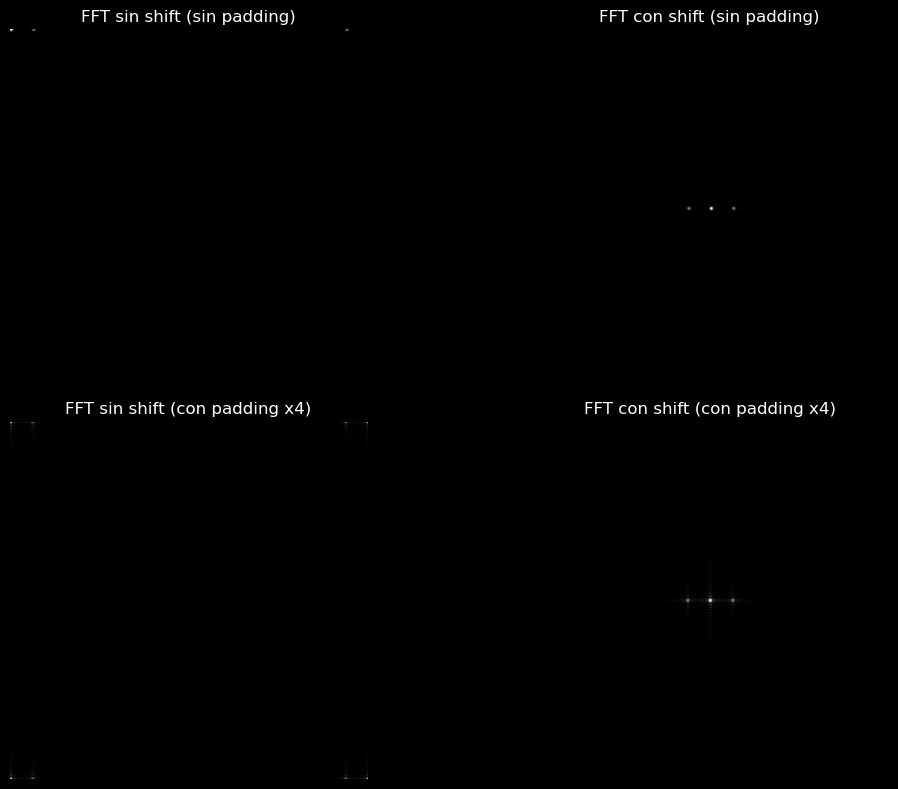

In [29]:

# Imagen base
arr, img_pil = create_sine_pattern(128, cycles=8)

# === FFT normal ===
U = np.fft.fft2(arr)   # usamos el ndarray
U_shift = np.fft.fftshift(U)

# === FFT con zero-padding (factor 4) === LO QUE DECIA EL PROFE DE MEJORAR LA RESOLUCIÓN EN EL ESPECTRO
pad_factor = 4
U_pad = np.fft.fft2(arr, s=(arr.shape[0]*pad_factor, arr.shape[1]*pad_factor))
U_pad_shift = np.fft.fftshift(U_pad)

# === Graficar ===
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(np.abs(U), cmap="gray")
plt.title("FFT sin shift (sin padding)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(np.abs(U_shift), cmap="gray")
plt.title("FFT con shift (sin padding)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(np.abs(U_pad), cmap="gray")
plt.title("FFT sin shift (con padding x4)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(np.abs(U_pad_shift), cmap="gray")
plt.title("FFT con shift (con padding x4)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Intento Miguel

4.6.0
Tamaño original: (480, 480, 3)


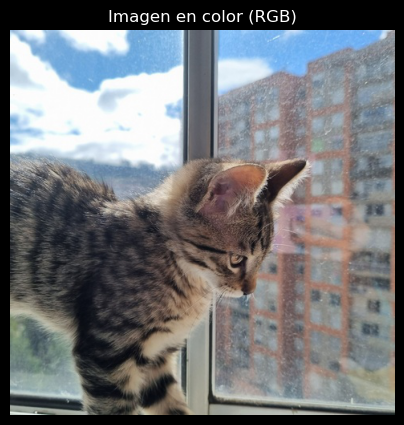

In [5]:
print(cv2.__version__)  

# Ruta de la imagen
base_dir = "talleres/taller1"   # <- ajusta si no estás en raíz del repo
data_path = "/home/miguel-perdomo/fourier-optics/talleres/taller1/dat/Imagen_prueba.jpeg" #Esta ruta se cambia según la ubicación exacta
img_color = cv2.imread(data_path, cv2.IMREAD_COLOR)

if img_color is None:
    raise FileNotFoundError(f"No se pudo cargar la imagen en {data_path}")
else:
    print("Tamaño original:", img_color.shape)  # (alto, ancho, canales)

# Convertir de BGR -> RGB (para que se vea bien en Matplotlib)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)


# Mostrar en el notebook
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Imagen en color (RGB)")
plt.axis("off")
plt.show()


Convertir la imágen en escala de grises 

tamaño original: (480, 480)
Imagen en gris guardada en: /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_prueba_gray.png


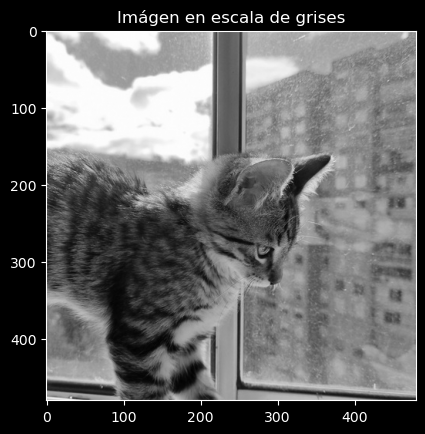

In [6]:
# Convertir a escala de grises
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
print("tamaño original:", img_gray.shape)

# Definir la ruta para guardarla
results_path = "/home/miguel-perdomo/fourier-optics/talleres/taller1/results" #De nuevo, esto se cambia dependiendo el local

# Guardar
gray_path = os.path.join(results_path, "Imagen_prueba_gray.png")
cv2.imwrite(gray_path, img_gray)

print(f"Imagen en gris guardada en: {gray_path}")
plt.Figure(figsize=(5,5))
plt.imshow(img_gray, cmap="gray")
plt.title("Imágen en escala de grises")
plt.show()

Guardada imagen muestreada cada 3 píxeles en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_prueba_sampled_3.png
Guardada imagen muestreada cada 5 píxeles en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_prueba_sampled_5.png
Guardada imagen muestreada cada 7 píxeles en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_prueba_sampled_7.png


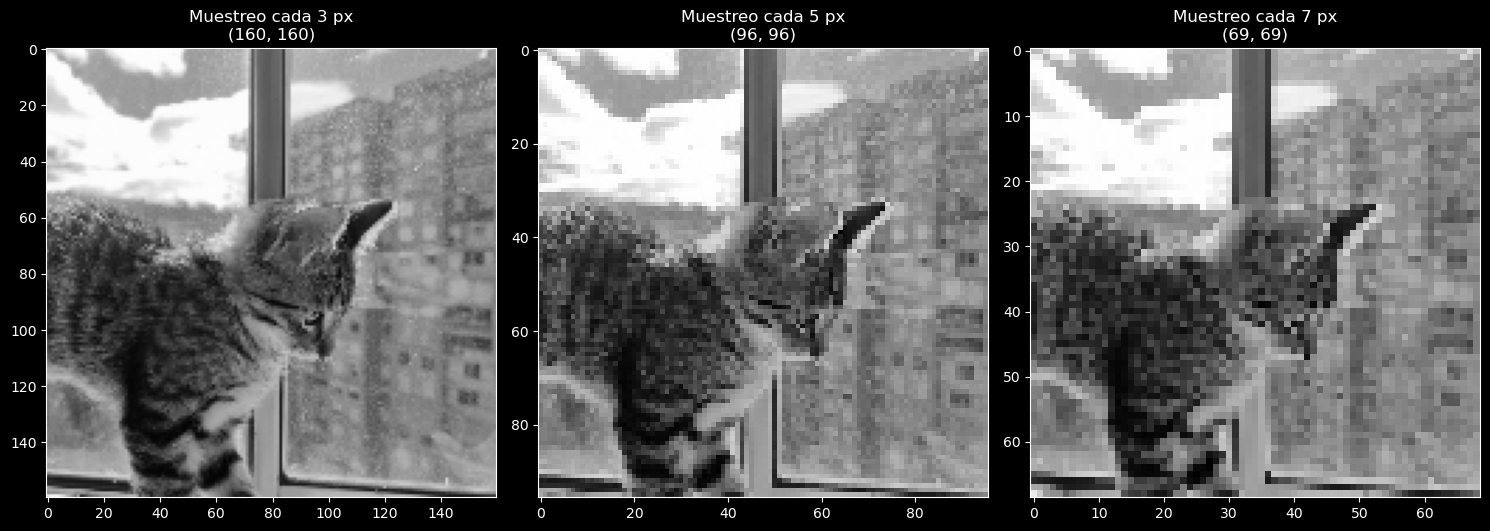

In [29]:
#factores de muestreo
factors = [3, 5, 7]
sampled_imgs = {}

for f in factors:
    sampled = img_gray[::f, ::f]   # tomar 1 de cada f filas y columnas
    sampled_imgs[f] = sampled
    
    # Guardar
    out_path = os.path.join(results_path, f"Imagen_prueba_sampled_{f}.png")
    cv2.imwrite(out_path, sampled)
    print(f"Guardada imagen muestreada cada {f} píxeles en {out_path}")

# Mostrar resultados en un solo plot
plt.figure(figsize=(15,5))
for i, f in enumerate(factors, 1):
    plt.subplot(1,3,i)
    plt.imshow(sampled_imgs[f], cmap="gray")
    plt.title(f"Muestreo cada {f} px\n{sampled_imgs[f].shape}")
plt.tight_layout()
plt.show()

## 🎯 Filtro cuadrado en el dominio de Fourier y condición de Nyquist–Shannon

En la práctica de reconstrucción de imágenes muestreadas, se construye una **máscara cuadrada** que conserva únicamente el **ló­bulo central del espectro de Fourier**. La idea es aplicar un **filtro pasa-bajo ideal** que retenga las bajas frecuencias (información esencial de la imagen) y descarte las altas frecuencias que se solapan debido al submuestreo creo que se llama aliasing.

### 1. Relación con el Teorema de Nyquist–Shannon

El **Teorema de Nyquist–Shannon** establece que:

$$
f_s \geq 2 f_\text{max}
$$

donde:
- $ f_s $ es la **frecuencia de muestreo** (número de muestras por unidad de espacio),
- $ f_\text{max} $ es la **máxima frecuencia presente** en la señal.

Si esta condición no se cumple, ocurre **aliasing**: copias del espectro se solapan y la señal no puede reconstruirse sin distorsión.

En imágenes, si realizamos un **submuestreo cada $s$ píxeles**, la nueva frecuencia de muestreo espacial se reduce en un factor $s$. Para evitar aliasing, debemos limitar el espectro a una fracción \$tfrac{1}{s}$ del ancho original. (ESTO SE DEBERÍA EXPLICAR MEJOR EN EL OVERLEAF)

Por lo tanto, el tamaño del cuadrado central debe cumplir:

$$
W_x = \frac{N_x}{s}, 
\quad
W_y = \frac{N_y}{s}
$$

donde $(N_x, N_y)$ son las dimensiones del espectro.  
En la implementación, se toma esta proporción como `keep_frac = 1/s`.

---

### 2. Construcción de la máscara cuadrada

La función `square_mask` definida abajo, hace lo siguiente:

1. Inicializa una matriz de ceros (rechazo de todas las frecuencias).
2. Calcula el centro del espectro $(c_y, c_x)$.
3. Define un rango de índices que cubre aproximadamente \(\tfrac{1}{s}\) del total en cada dirección.
4. Asigna **1** dentro de ese cuadrado, manteniendo únicamente el **ló­bulo central**.

En notación:

$$
M(u,v) =
\begin{cases}
1 & \text{si } |u| \leq \tfrac{f_s}{2s}, \, |v| \leq \tfrac{f_s}{2s} \\
0 & \text{en otro caso}
\end{cases}
$$

donde $(u,v)$ son coordenadas en el dominio de frecuencia.

---

### 3. Intuición

- El cuadrado central **equivale a aplicar un pasa-bajo ideal** en ambas direcciones espaciales.  
- El tamaño del cuadrado depende directamente del factor de submuestreo \(s\).  
- Conservar solo esta fracción del espectro asegura que no haya **aliasing**, cumpliendo con la condición de Nyquist.

---

✅ **En resumen:**  
La máscara cuadrada implementa el teorema de Nyquist–Shannon en 2D: al submuestrear la imagen, reducimos la frecuencia de muestreo; para evitar aliasing, debemos filtrar en Fourier y conservar solo la porción central \(\tfrac{1}{s}\) del espectro.


In [13]:
# --- FFT 2D con "centro" consistente (DC centrada) ---
def FT2(u):
    # u: imagen 2D (float)
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))

def IFT2(U):
    # U: espectro 2D complejo con DC centrada
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(U)))

def _self_check_ft(u):
    U = FT2(u)
    u_back = IFT2(U).real
    err = np.max(np.abs(u - u_back))
    print(f"[FT2/IFT2] max abs error = {err:.3e}")

# --- Máscara cuadrada centrada que conserva una fracción del ancho/alto ---
def square_mask(shape, keep_frac):
    """
    shape = (Ny, Nx) de la imagen/espectro.
    keep_frac in (0,1]: fracción del ancho/alto que se conservará alrededor de DC.
    Devuelve máscara binaria con 1 en un cuadrado central y 0 fuera.
    """
    Ny, Nx = shape #Recordemos shape en escala de grises devuelve (alto, ancho) --> (480,480)
    wy = max(1, int(np.floor(keep_frac * Ny)))  # alto del cuadrado a conservar
    wx = max(1, int(np.floor(keep_frac * Nx)))  # ancho del cuadrado a conservar
    # forzamos a impar para centrar exactamente
    if wy % 2 == 0: wy += 1
    if wx % 2 == 0: wx += 1

    mask = np.zeros((Ny, Nx), dtype=np.float32)
    cy, cx = Ny // 2, Nx // 2  #Coordenadas del centro del espectro
    y0, y1 = cy - wy//2, cy + wy//2 + 1  #Calcular los limites del cuadrado
    x0, x1 = cx - wx//2, cx + wx//2 + 1
    mask[y0:y1, x0:x1] = 1.0 #tomar 1 solo para ese cuadrado
    return mask

def _debug_mask(U, M):
    import matplotlib.pyplot as plt
    A = np.abs(U)
    vmax = np.percentile(A, 99)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1); plt.imshow(A, cmap="gray", vmax=vmax); plt.title("|U|"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(M, cmap="gray"); plt.title("Máscara"); plt.axis("off")
    plt.tight_layout(); plt.show()


## 🔄 Reconstrucción por Fourier con ventana cuadrada

La función `recon_fourier_square` implementa la reconstrucción de una imagen muestreada a partir de su transformada de Fourier, aplicando un **filtro cuadrado** centrado en la DC (frecuencia cero). El objetivo es retener únicamente el **ló­bulo central del espectro** y así evitar aliasing.

### 1. Entrada y parámetros

- `img_gray`: imagen muestreada en escala de grises (ndarray 2D).  
- `s`: factor de submuestreo (ej. 3, 5, 7).  
- `show`: si es `True`, muestra un panel con la imagen de entrada, la FFT, la máscara y la reconstrucción.  
- `save_dir`: si se indica, guarda el resultado en disco.  
- `tag`: etiqueta opcional para el nombre del archivo de salida.  

### 2. Procedimiento paso a paso

1. **Normalización**  
   Se convierte la imagen a tipo float en \([0,1]\):

   $$
   u(x,y) = \frac{I(x,y)}{255}, \quad I(x,y) \in [0,255]
   $$

2. **Transformada de Fourier 2D (centrada)**  
   Se calcula la FFT 2D con `FT2(u)`, que devuelve la transformada compleja \(U(u,v)\) con la DC en el centro.

   $$
   U(u,v) = \mathcal{F}\{u(x,y)\}
   $$

3. **Máscara cuadrada**  
   Usando la regla de Nyquist–Shannon, al submuestrear cada $s$ píxeles, solo se puede conservar la fracción central \(\tfrac{1}{s}\) del espectro:

   $$
   M(u,v) =
   \begin{cases}
   1 & \text{si } |u| \leq \tfrac{f_s}{2s}, \, |v| \leq \tfrac{f_s}{2s} \\
   0 & \text{otro caso}
   \end{cases}
   $$

   En el código, esto se traduce como:

   ```python
   keep_frac = 1.0 / s
   M = square_mask(Uc.shape, keep_frac)


In [9]:
def recon_fourier_square(img_gray, s, show=True, save_dir=None, tag=""):
    """
    img_gray: ndarray 2D (uint8 o float) muestreada cada s píxeles (ambas direcciones).
    s: factor de muestreo (3,5,7,...)
    show: si True, grafica panel con antes/después y máscara
    save_dir: si se indica, guarda la reconstrucción en esa carpeta
    tag: texto para nombres de archivo
    """
    # 1) A float [0,1]
    u = img_gray.astype(np.float32)
    if u.max() > 1.0: u = u / 255.0

    # 2) FFT 2D centrada
    Uc = FT2(u)  # COMPLEJA, esto es lo que debemos filtrar (no |U|)
    
    # 3) Ventana cuadrada del lóbulo central
    keep_frac = 1.0 / float(s)   # regla práctica: conservar ~1/s
    M = square_mask(Uc.shape, keep_frac=keep_frac)

    # 4) Filtrado en el dominio de Fourier (complejo)
    Uc_filt = Uc * M

    # 5) Transformada inversa
    u_rec = IFT2(Uc_filt).real
    # normalizamos a [0,1] para guardar/mostrar
    u_rec = np.clip(u_rec, 0.0, 1.0)

    # Panel opcional
    if show:
        # Para visualizar |U| sin usar log, recortamos el contraste con percentil
        def show_abs(A):
            Aabs = np.abs(A)
            vmax = np.percentile(Aabs, 99) if Aabs.size > 0 else 1.0
            plt.imshow(Aabs, cmap="gray", vmax=vmax)
            plt.axis("off")

        plt.figure(figsize=(10,6))
        plt.suptitle(f"Reconstrucción Fourier (ventana cuadrada) – s={s}", y=0.98)

        plt.subplot(2,3,1); plt.imshow(u, cmap="gray"); plt.title("Entrada muestreada"); plt.axis("off")
        plt.subplot(2,3,2); show_abs(Uc); plt.title("|FFT| (DC centrada)")
        plt.subplot(2,3,3); plt.imshow(M, cmap="gray"); plt.title("Máscara cuadrada (lóbulo central)"); plt.axis("off")

        plt.subplot(2,3,4); show_abs(Uc_filt); plt.title("|FFT filtrada|")
        plt.subplot(2,3,5); plt.imshow(u_rec, cmap="gray"); plt.title("Reconstrucción (IFFT)"); plt.axis("off")
        plt.subplot(2,3,6); plt.axis("off"); plt.text(0,0.5,"Filtrado sobre U (compleja)", fontsize=10)

        plt.tight_layout()
        plt.show()

    # Guardado opcional
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        out_path = os.path.join(save_dir, f"recon_fourier_square_s{s}{tag}.png")
        cv2.imwrite(out_path, (u_rec*255).astype(np.uint8))

    return (u_rec*255).astype(np.uint8), M


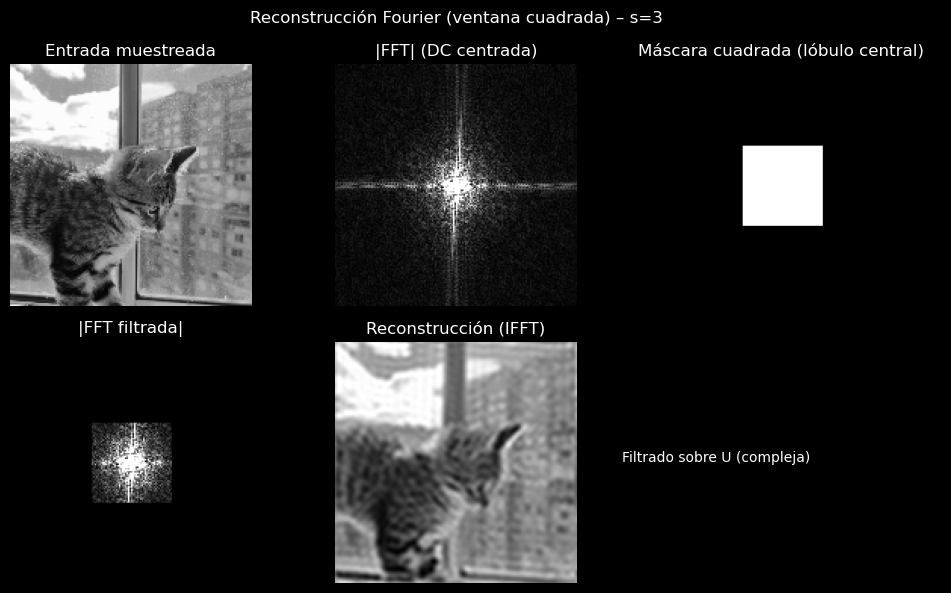

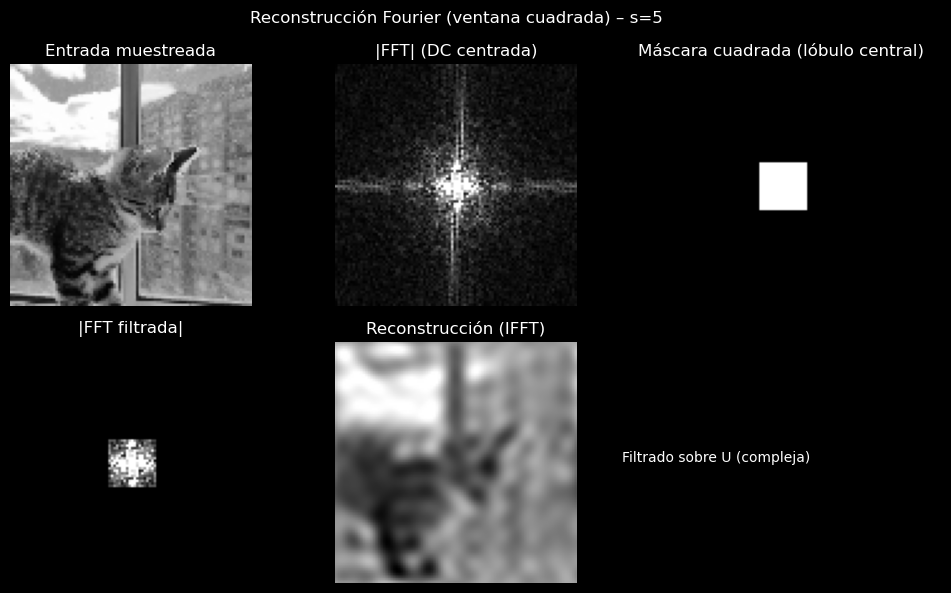

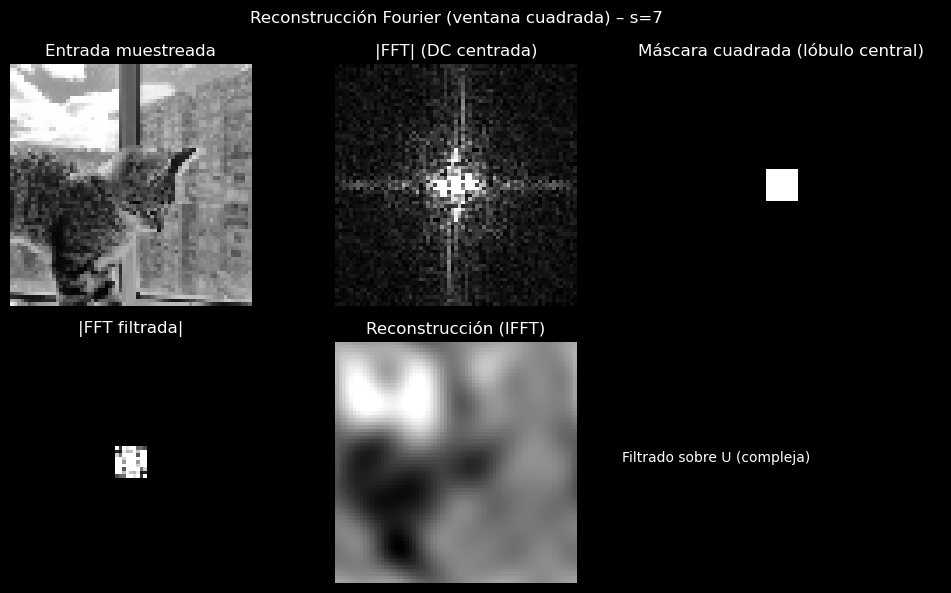

In [10]:
# === Automatizar para todas las imágenes muestreadas ===
paths_sampled = {
    3: os.path.join(results_path, "Imagen_prueba_sampled_3.png"),
    5: os.path.join(results_path, "Imagen_prueba_sampled_5.png"),
    7: os.path.join(results_path, "Imagen_prueba_sampled_7.png"),
}

for s, path in paths_sampled.items():
    if not os.path.exists(path):
        print(f"⚠️ No se encontró {path}, saltando...")
        continue
    img_s = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    rec, mask = recon_fourier_square(img_s, s, show=True, save_dir=results_path, tag=f"_Imagen_prueba")



# MEJOR MUESTREO (estaba mal y no había espacio para el aliasing)

Imagen original: 480×480
[OK] Guardada imagen muestreada con comb (f=3) en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_comb_sampled_3.png
[OK] Guardada imagen muestreada con comb (f=5) en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_comb_sampled_5.png
[OK] Guardada imagen muestreada con comb (f=7) en /home/miguel-perdomo/fourier-optics/talleres/taller1/results/Imagen_comb_sampled_7.png


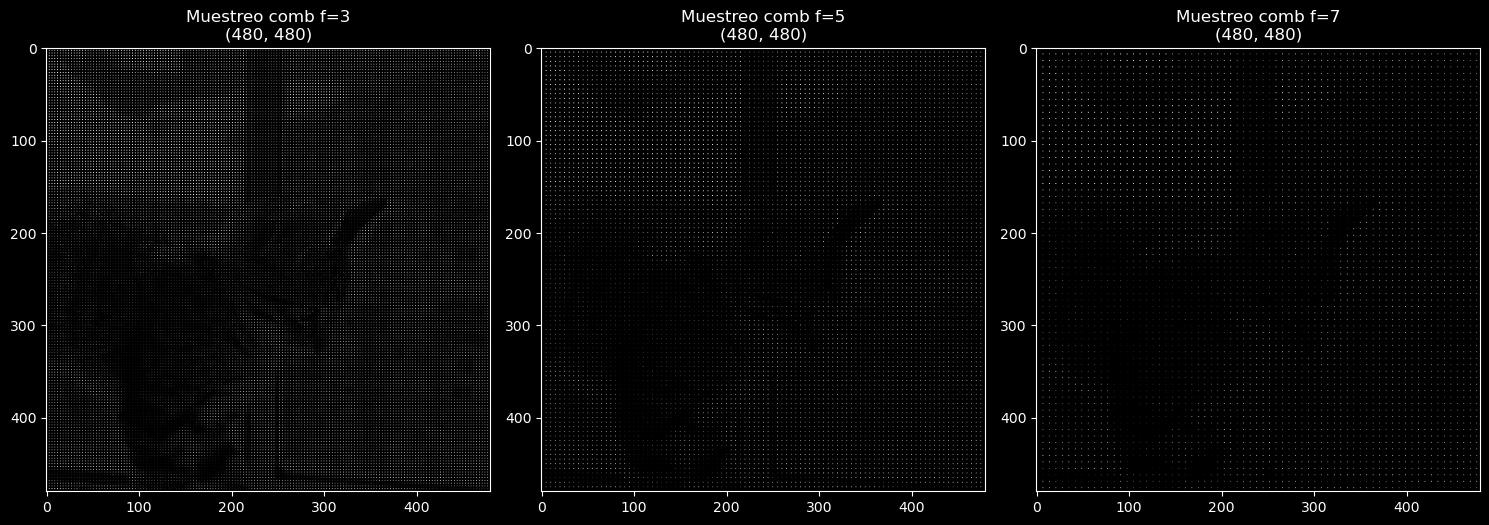

In [40]:
# === Ruta ===
results_path = "/home/miguel-perdomo/fourier-optics/talleres/taller1/results"

# === Imagen base ===
img_path = os.path.join(results_path, "Imagen_prueba_gray.png")
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(f"No se encontró la imagen base: {img_path}")

H, W = img_gray.shape
print(f"Imagen original: {W}×{H}")

# === Factores de muestreo ===
factors = [3, 5, 7]
sampled_imgs = {}

for f in factors:
    # Creamos máscara "peine" (comb discreto)
    mask = np.zeros_like(img_gray, dtype=np.uint8)
    mask[::f, ::f] = 1  # deltas cada f píxeles

    # Muestreo = multiplicar imagen por el comb
    sampled = img_gray * mask
    sampled_imgs[f] = sampled

    # Guardar resultado
    out_path = os.path.join(results_path, f"Imagen_comb_sampled_{f}.png")
    cv2.imwrite(out_path, sampled)
    print(f"[OK] Guardada imagen muestreada con comb (f={f}) en {out_path}")

# === Mostrar resultados ===
plt.figure(figsize=(15, 6))
for i, f in enumerate(factors, 1):
    plt.subplot(1, 3, i)
    plt.imshow(sampled_imgs[f], cmap="gray")
    plt.title(f"Muestreo comb f={f}\n{sampled_imgs[f].shape}")
    plt.axis()
plt.tight_layout()
plt.show()

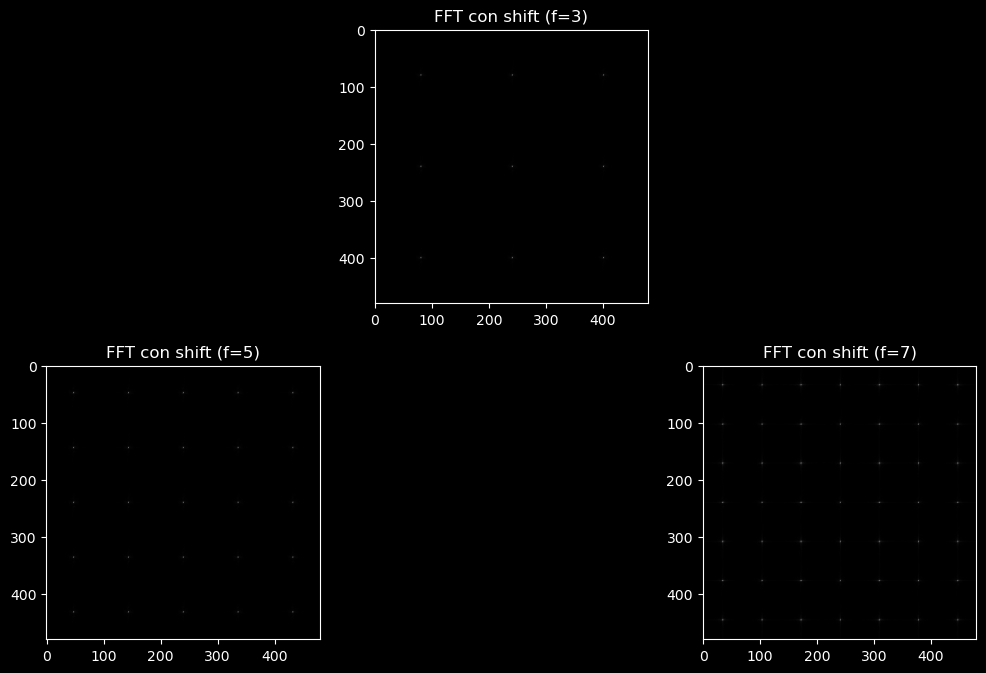

<Figure size 2000x500 with 0 Axes>

In [61]:
plt.figure(figsize=(12, 8))

for i, f in enumerate(factors, 1):
    # Cargar la imagen muestreada
    path = os.path.join(results_path, f"Imagen_comb_sampled_{f}.png")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"No se encontró la imagen: {path}")

    arr = img.astype(np.float32)

    # FFT
    U = np.fft.fft2(arr)
    U_shift = np.fft.fftshift(U)

    plt.subplot(2, 3, 2*i)
    plt.imshow(np.abs(U_shift), cmap="gray")
    plt.title(f"FFT con shift (f={f})")
    plt.axis()

plt.figure(figsize=(20, 5))
plt.tight_layout()
plt.show()



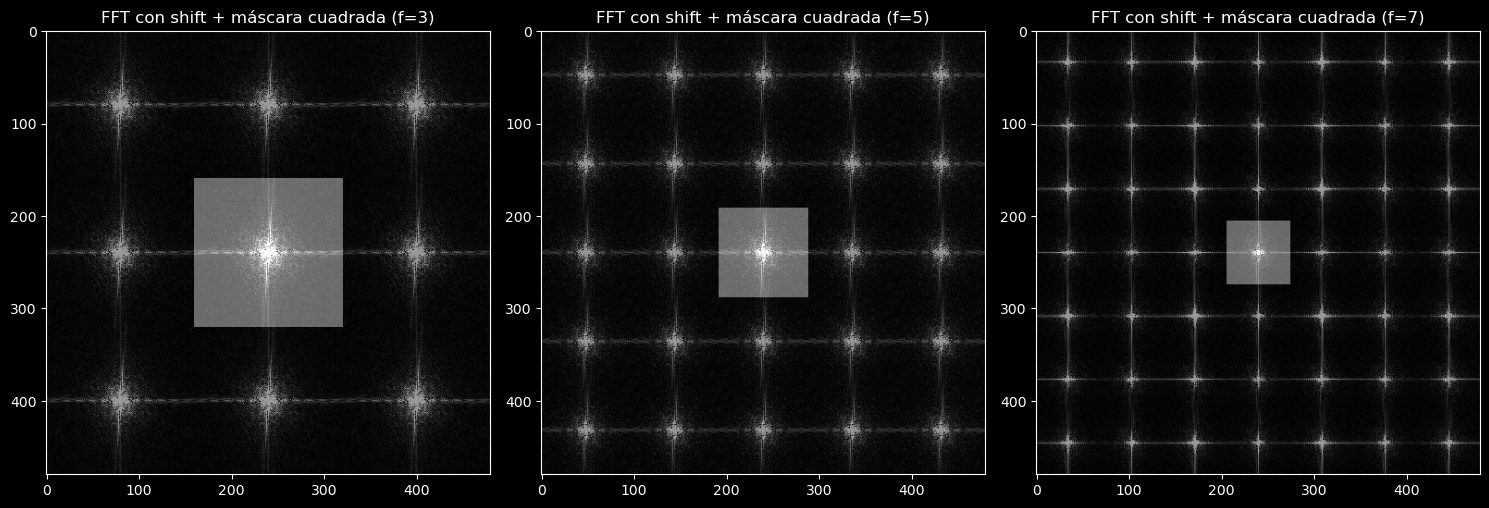

In [52]:
# --- Máscara cuadrada centrada que conserva una fracción del ancho/alto ---
def square_mask(shape, keep_frac):
    """
    shape = (Ny, Nx) de la imagen/espectro.
    keep_frac in (0,1]: fracción del ancho/alto que se conservará alrededor de DC.
    Devuelve máscara binaria con 1 en un cuadrado central y 0 fuera.
    """
    Ny, Nx = shape #Recordemos shape en escala de grises devuelve (alto, ancho) --> (480,480)
    wy = max(1, int(np.floor(keep_frac * Ny)))  # alto del cuadrado a conservar
    wx = max(1, int(np.floor(keep_frac * Nx)))  # ancho del cuadrado a conservar
    # forzamos a impar para centrar exactamente
    if wy % 2 == 0: wy += 1
    if wx % 2 == 0: wx += 1

    mask = np.zeros((Ny, Nx), dtype=np.float32)
    cy, cx = Ny // 2, Nx // 2  #Coordenadas del centro del espectro
    y0, y1 = cy - wy//2, cy + wy//2 + 1  #Calcular los limites del cuadrado
    x0, x1 = cx - wx//2, cx + wx//2 + 1
    mask[y0:y1, x0:x1] = 1.0 #tomar 1 solo para ese cuadrado
    return mask

plt.figure(figsize=(15, 5))

for i, f in enumerate(factors, 1):
    # Cargar la imagen muestreada
    path = os.path.join(results_path, f"Imagen_comb_sampled_{f}.png")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"No se encontró la imagen: {path}")

    arr = img.astype(np.float32)

    # FFT con shift (DC al centro)
    U = np.fft.fft2(arr)
    U_shift = np.fft.fftshift(U)

    # Crear máscara cuadrada: Nyquist → conservar 1/f del espectro
    keep_frac = 1.0 / f
    M = square_mask(U_shift.shape, keep_frac)

    # Magnitud para graficar
    A = np.abs(U_shift)
    vmax = np.percentile(A, 99)  # recorte para que no se sature

    # Graficar espectro con máscara encima
    plt.subplot(1, 3, i)
    plt.imshow(A, cmap="gray", vmax=vmax)
    plt.imshow(M, cmap="gray", alpha=0.4)  # máscara superpuesta en color
    plt.title(f"FFT con shift + máscara cuadrada (f={f})")
    plt.axis()

plt.tight_layout()
plt.show()


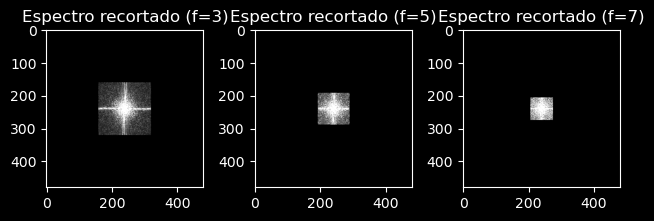

In [64]:
for i, f in enumerate(factors, 1):
    # Cargar la imagen muestreada
    path = os.path.join(results_path, f"Imagen_comb_sampled_{f}.png")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"No se encontró la imagen: {path}")

    arr = img.astype(np.float32)

    # FFT con shift
    U = np.fft.fft2(arr)
    U_shift = np.fft.fftshift(U)

    # Crear máscara cuadrada
    keep_frac = 1.0 / f
    M = square_mask(U_shift.shape, keep_frac)

    # Aplicar máscara (recortar espectro)
    U_masked = U_shift * M

    # Magnitud del espectro recortado
    A = np.abs(U_masked)
    vmax = np.percentile(A, 99)

    # Graficar espectro recortado
    plt.subplot(1, 3, i)
    plt.imshow(A, cmap="gray", vmax=vmax)
    plt.title(f"Espectro recortado (f={f})")
    plt.axis()

plt.tight_layout()
plt.show()

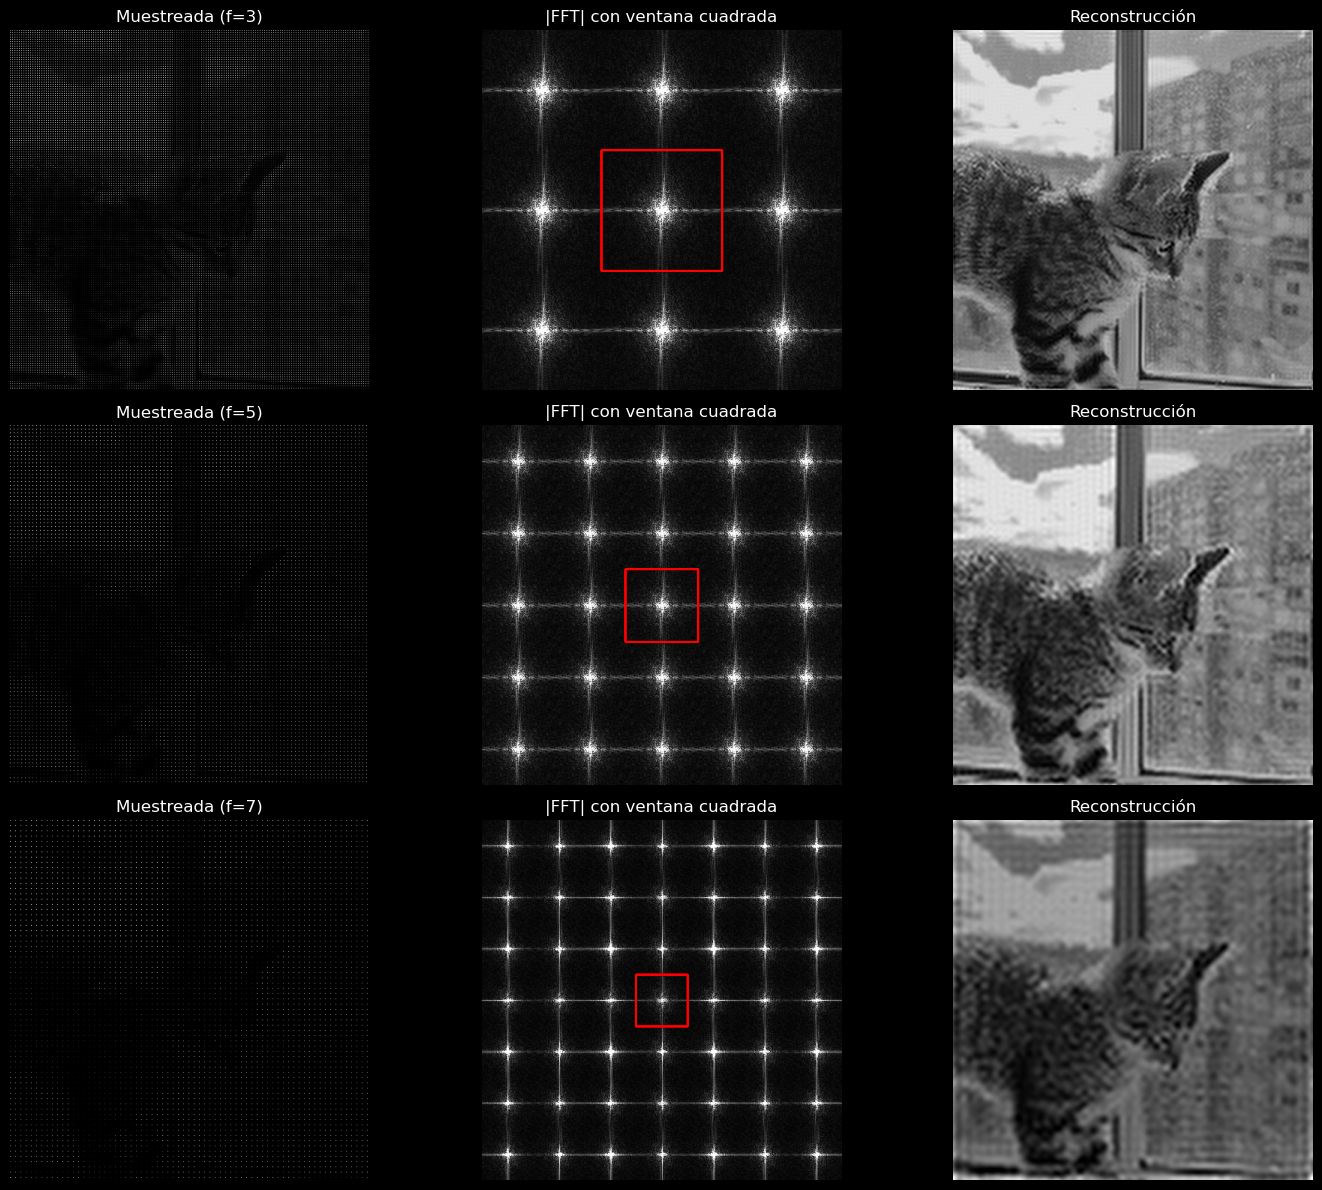

In [67]:
# --- Reconstrucción Fourier con ventana cuadrada ---
def recon_fourier_square(img_gray, s):
    u = img_gray.astype(np.float32)
    if u.max() > 1.0:
        u /= 255.0

    # FFT centrada
    Uc = FT2(u)

    # Máscara cuadrada
    keep_frac = 1.0 / float(s)
    M = square_mask(Uc.shape, keep_frac=keep_frac)

    # Espectro filtrado
    Uc_filt = Uc * M

    # Reconstrucción
    u_rec = IFT2(Uc_filt).real
    u_rec = np.clip(u_rec, 0.0, 1.0)

    return u, Uc, M, u_rec

# === Panel 3x3 ===
plt.figure(figsize=(15, 12))

for i, f in enumerate(factors, 1):
    # Cargar la imagen muestreada
    path = os.path.join(results_path, f"Imagen_comb_sampled_{f}.png")
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"No se encontró la imagen: {path}")

    u, Uc, M, u_rec = recon_fourier_square(img, f)

    # 1) Imagen muestreada
    plt.subplot(3, 3, 3*(i-1)+1)
    plt.imshow(u, cmap="gray")
    plt.title(f"Muestreada (f={f})")
    plt.axis("off")

    # 2) Espectro con cuadro superpuesto
    plt.subplot(3, 3, 3*(i-1)+2)
    A = np.abs(Uc)
    vmax = np.percentile(A, 99)
    plt.imshow(A, cmap="gray", vmax=vmax)
    plt.contour(M, colors="red", linewidths=1)  # marco cuadrado
    plt.title("|FFT| con ventana cuadrada")
    plt.axis("off")

    # 3) Imagen reconstruida
    plt.subplot(3, 3, 3*(i-1)+3)
    plt.imshow(u_rec, cmap="gray")
    plt.title("Reconstrucción")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [70]:
def recon_convolution(img_gray, s, show=True, save_dir=None, tag=""):
    """
    Reconstrucción por convolución usando el kernel asociado
    a la ventana cuadrada de Fourier.

    img_gray: ndarray 2D (imagen muestreada con comb).
    s: factor de muestreo (3,5,7,...).
    """
    # 1) Normalizar a [0,1]
    u = img_gray.astype(np.float32)
    if u.max() > 1.0:
        u /= 255.0

    # 2) FFT del muestreo para conocer dimensiones
    Uc = FT2(u)

    # 3) Máscara cuadrada (misma que en Fourier)
    keep_frac = 1.0 / float(s)
    M = square_mask(Uc.shape, keep_frac=keep_frac)

    # 4) Kernel espacial = IFFT2(M)
    h = IFT2(M).real
    # Normalizamos el kernel para que conserve energía
    h /= np.sum(h)

    # 5) Convolución imagen muestreada * kernel
    u_rec = convolve2d(u, h, mode="same", boundary="symm")
    u_rec = np.clip(u_rec, 0.0, 1.0)

    # 6) Mostrar panel
    if show:
        plt.figure(figsize=(10,6))
        plt.suptitle(f"Reconstrucción por Convolución – s={s}", y=0.98)

        plt.subplot(1,3,1); plt.imshow(u, cmap="gray"); plt.title("Entrada muestreada"); plt.axis("off")
        plt.subplot(1,3,2); plt.imshow(h, cmap="gray"); plt.title("Kernel (IFT máscara cuadrada)"); plt.axis("off")
        plt.subplot(1,3,3); plt.imshow(u_rec, cmap="gray"); plt.title("Reconstrucción"); plt.axis("off")

        plt.tight_layout()
        plt.show()

    # 7) Guardar si corresponde
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        out_path = os.path.join(save_dir, f"recon_convolution_s{s}{tag}.png")
        cv2.imwrite(out_path, (u_rec*255).astype(np.uint8))

    return (u_rec*255).astype(np.uint8), h


In [ ]:
# --- Reconstrucción por convolución ---
def recon_convolution(img_gray, s, show=True, save_dir=None, tag=""):
    """
    Reconstrucción por convolución usando el kernel
    asociado a la ventana cuadrada en Fourier.
    """
    # 1) Normalizar a [0,1]
    u = img_gray.astype(np.float32)
    if u.max() > 1.0:
        u /= 255.0

    # 2) FFT del muestreo
    Uc = FT2(u)

    # 3) Máscara cuadrada
    keep_frac = 1.0 / float(s)
    M = square_mask(Uc.shape, keep_frac=keep_frac)

    # 4) Kernel espacial = IFFT2(M)
    h = IFT2(M).real
    h /= np.sum(h)  # normalizar energía

    # 5) Convolución
    u_rec = convolve2d(u, h, mode="same", boundary="symm")
    u_rec = np.clip(u_rec, 0.0, 1.0)

    # 6) Mostrar panel
    if show:
        plt.figure(figsize=(10,6))
        plt.suptitle(f"Reconstrucción por Convolución – s={s}", y=0.98)

        plt.subplot(1,3,1); plt.imshow(u, cmap="gray"); plt.title("Entrada muestreada"); plt.axis("off")
        plt.subplot(1,3,2); plt.imshow(h, cmap="gray"); plt.title("Kernel (IFT máscara cuadrada)"); plt.axis("off")
        plt.subplot(1,3,3); plt.imshow(u_rec, cmap="gray"); plt.title("Reconstrucción"); plt.axis("off")

        plt.tight_layout()
        plt.show()

    # 7) Guardar opcional
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        out_path = os.path.join(save_dir, f"recon_convolution_s{s}{tag}.png")
        cv2.imwrite(out_path, (u_rec*255).astype(np.uint8))

    return (u_rec*255).astype(np.uint8), h